In [10]:
graph_edge_list = '''
    1 2 3
    1 3 2
    2 4 2
    2 5 3
    3 4 5
'''

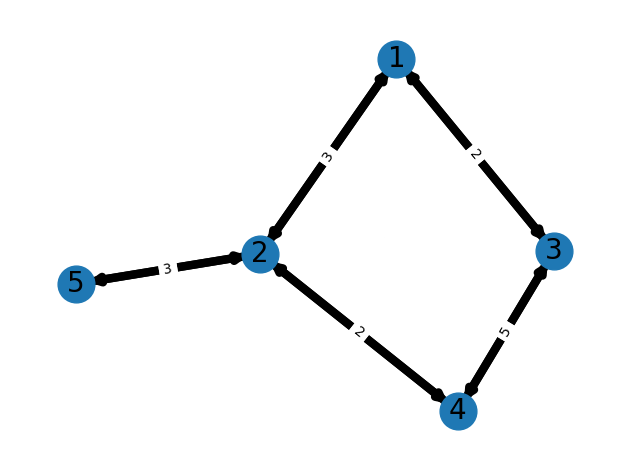

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for line in graph_edge_list.split('\n'):
    if line:
        u, v, weight = line.split()
        G.add_edge(u, v, weight=int(weight))
        G.add_edge(v, u, weight=int(weight))

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=6)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
# Dijkstra's algorithm
def dijkstra(graph: nx.Graph, start = None):
    Q = []

    # Leere dicts, um den Vorgänger-Knoten und die Distanz zu behalten
    dist = dict()
    prev = dict()

    # Setze die Distanz zu allen Knoten mit unendlich
    for node in list(graph.nodes()):
        dist[node] = float('inf')
        prev[node] = None
        Q.append(node)

    # TODO variable start
    start = start if (start is not None) else Q[0]
    dist[start] = 0

    # Solang Knoten in Q
    while len(Q) > 0:
        # Verarbeite den nächsten Knoten aus Q
        u = Q.pop(0)

        edges = graph.out_edges(u, data=True)

        # Prüfe für alle Kanten von u
        for (_, v, data) in edges:
            # Ob die aktuelle Distanz von u plus das Gewicht der Kante
            alt = dist[u] + data['weight']

            # Kleiner ist, als die aktuelle Distanz zu v
            if alt < dist[v]:
                # wenn ja, aktualisiere den Vorgänger und die Distanz zu v
                dist[v] = alt
                prev[v] = u

    return (dist, prev, start)

dist, prev, start = dijkstra(G)

print(dist, prev)

{'1': 0, '2': 3, '3': 2, '4': 5, '5': 6} {'1': None, '2': '1', '3': '1', '4': '2', '5': '2'}


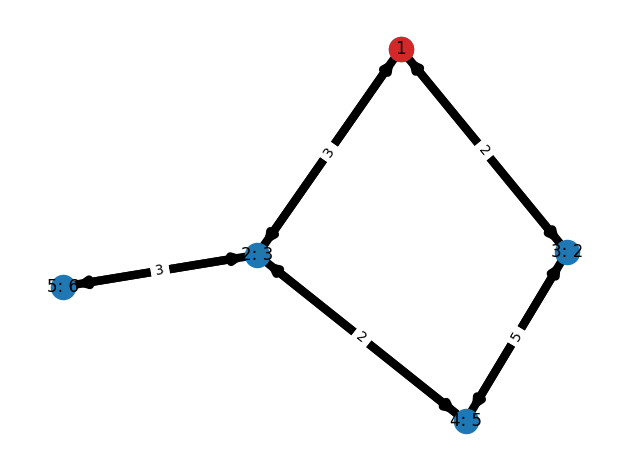

In [13]:
# Start Node
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color="tab:red")

labels = {}

for v in G.nodes():
    if dist[v] == 0:
        labels[v] = v
        continue

    labels[v] = f"{v}: {dist[v]}"

nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=6)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.tight_layout()
plt.axis("off")
plt.show()
